# I. Разминка numpy (1 балл)

## 1. Парсеки

Напишите функцию, которая принимает на вход:
- np.array - набор расстояний от Земли до звёзд (в световых годах)
- k - количество значений, которое нам нужно

Выведите топ-k самых удаленных звёзд от нас в порядке убывания разрастания, расстояния выведите в парсеках (1 парсек приблизительно равен 3.262 световым годам)

In [15]:
import numpy as np
def find_top_k_longest_distance_stars(distances: np.array, k):
  sorted_distances_p = np.sort(distances)[::-1]/3.262
  if k <= len(distances):
    print('Here are the distances in parseks')
    return sorted_distances_p[:k]
  else:
    print('Be careful, we have less volume of data then you want, so, here is the full array of distances in parseks:')
    return sorted_distances_p

In [16]:
# Просто пример, можно придумать свой
print(find_top_k_longest_distance_stars(np.array([4.37, 8.6, 4.24, 4.37, 5.96, 7.8, 8.6, 7.9]), 4))

Here are the distances in parseks
[2.63641937 2.63641937 2.4218271  2.39117106]


In [17]:
print(find_top_k_longest_distance_stars(np.array([4.37, 8.6, 4.24, 4.37, 5.96, 7.8, 8.6, 7.9]), 100))

Be careful, we have less volume of data then you want, so, here is the full array of distances in parseks:
[2.63641937 2.63641937 2.4218271  2.39117106 1.82709994 1.33966891
 1.33966891 1.29981606]


## 2. Оцениваем размер галактики

Напишите функцию, которая принимает на вход:
- np.array - набор масс звёзд в галактике
- k - количество максимальных по массе звёзд

Функция должна вывести два числа - первое - сумму масс первых k звёзд по массе, второе - сумму масс остальных звёзд.

In [18]:
def count_k_masses(masses: np.array, k):
  masses_sorted = np.sort(masses)[::-1]
  if k <= len(masses):
    print(f'Here is the sum of masses of first {k} stars and other {len(masses) - k} stars')
    return np.sum(masses_sorted[:k]), np.sum(masses_sorted[k:])
  else:
    print('Be careful, we have less volume of data then you want, so, here is the sum of all masses:')
    return np.sum(masses_sorted)

In [19]:
# Просто пример, можно придумать свой
print(count_k_masses(np.array([150, 200, 300, 250, 400, 100, 200]), 2))

Here is the sum of masses of first 2 stars and other 5 stars
(700, 900)


In [20]:
print(count_k_masses(np.array([150, 200, 300, 250, 400, 100, 200]), 100))

Be careful, we have less volume of data then you want, so, here is the sum of all masses:
1600


# II. Помогаем Карелии

## 0. Загрузи датасет в этот блокнот (0.5 балла)

Открой гугл-диск курса, разархивируй zip-архив и собери нужные наборы данных из архива в единый датасет при помощи pandas.

In [21]:
import pandas as pd
df1 = pd.read_excel('/content/2010.xlsx', sheet_name='доходы (исполнено) 2010', usecols=[0, 3], header=None, index_col=0, names=['Категории доходов', '2010'])
df2 = pd.read_excel('/content/2011.xlsx', sheet_name='доходы (исполнено) 2011', usecols=[0, 3], header=None, index_col=0, names=['Категории доходов', '2011'])
df3 = pd.read_excel('/content/2012.XLS', sheet_name='доходы (исполнено) 2012', usecols=[0, 4], header=None, index_col=0, names=['Категории доходов', '2012'])
df4 = pd.read_excel('/content/2013.xls', sheet_name='доходы (исполнено) 2013', usecols=[0, 3], header=None, index_col=0, names=['Категории доходов', '2013'])
df5 = pd.read_excel('/content/2014.XLS', sheet_name='доходы (исполнено) 2014', usecols=[0, 3], header=None, index_col=0, names=['Категории доходов', '2014'])
df6 = pd.read_excel('/content/2015.xls', sheet_name='доходы (исполнено) 2015', usecols=[0, 3], header=None, index_col=0, names=['Категории доходов', '2015'])

In [22]:
dataframes = [df1, df2, df3, df4, df5, df6]
incomes=[]
for i in range(0, 2):
  incomes.append(dataframes[i].iloc[3, 0])
for i in range(2, 6):
  incomes.append(dataframes[i].iloc[2, 0])

In [23]:
for i in range(0, 6):
  dataframes[i] = dataframes[i][~dataframes[i].index.duplicated(keep='first')]
df1, df2, df3, df4, df5, df6 = dataframes
df_merged_income = df1.join([df2, df3, df4, df5, df6], how='inner')
df_merged_income = df_merged_income.drop([np.nan], axis=0)

In [24]:
for i in range(6, 10):
  dfs = pd.read_excel(f'/content/201{i}.xlsx', sheet_name=f'доходы (исполнено) 201{i}', usecols=[0, 3], header=None, index_col=0, names=['Категории доходов', f'201{i}'])
  incomes.append(dfs.iloc[2, 0])
  dfs = dfs[~dfs.index.duplicated(keep='first')]
  df_merged_income = df_merged_income.join([dfs], how ='inner')

In [25]:
df20 = pd.read_excel('/content/2020.xlsx', sheet_name='доходы (исполнено) 2020', usecols=[0, 3], header=None, index_col=0, names=['Категории доходов', '2020'])
incomes.append(df20.iloc[2, 0])
df20 = df20[~df20.index.duplicated(keep='first')]
df_merged_income = df_merged_income.join([df20], how ='inner')
df_merged_income

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Категории доходов,,,,,,,,,,,
НАЛОГОВЫЕ И НЕНАЛОГОВЫЕ ДОХОДЫ,15322132232.73,18202689345.18,17570424288.029999,15173763025.93,15956764902,17808163620.080002,19654412574.419998,20129196349.220001,26604349315.43,27763981934.919998,27131141282.57
"НАЛОГИ НА ПРИБЫЛЬ, ДОХОДЫ",8613483384.459999,11334538970.16,10813732699.530001,8101885886.87,8916328469.16,9962889434.440001,11518070774.48,11700807336.309999,16900358608,17336881098.560001,15165765187.879999
Налог на прибыль организаций,3980212142.4,6262562069.63,5279887784.7,2200021502.01,1837840442.62,3114014266.32,4280042099.75,4022683492.19,8128882485.27,8162340492.33,5058407816.68
"Налог на прибыль организаций, зачисляемый в бюджеты бюджетной системы Российской Федерации по соответствующим ставкам",3980212142.4,6262562069.63,5279887784.7,2200021502.01,1837840442.62,3114014266.32,4280042099.75,4022683492.19,8128882485.27,8162340492.33,5058407816.68
Налог на доходы физических лиц,4633271242.06,5071976900.53,5533844914.83,5901864384.86,7078488026.54,6848875168.12,7238028674.73,7678123844.12,8771476122.73,9174540606.23,10107357371.200001
...,...,...,...,...,...,...,...,...,...,...,...
БЕЗВОЗМЕЗДНЫЕ ПОСТУПЛЕНИЯ ОТ ГОСУДАРСТВЕННЫХ (МУНИЦИПАЛЬНЫХ) ОРГАНИЗАЦИЙ,1075330749,52256308.5,272988507.35,-126460325.25,150544153.48,868429101.1,1987554808.08,738518680.3,751477164.22,373995097.91,1066752205.38
ПРОЧИЕ БЕЗВОЗМЕЗДНЫЕ ПОСТУПЛЕНИЯ,157669883.87,156044685.64,92881294.18,276745489.01,196073282.36,146130127.84,7920190.94,8900000,11112952.37,9511191.38,1305208
Прочие безвозмездные поступления в бюджеты субъектов Российской Федерации,157669883.87,156044685.64,92881294.18,276745489.01,196073282.36,146130127.84,NaN,NaN,NaN,9511191.38,1305208


In [26]:
has_duplicates = df_merged_income.index.duplicated().any()

if has_duplicates:
    print("В DataFrame есть дубликаты индексов.")
else:
    print("В DataFrame нет дубликатов индексов.")

В DataFrame нет дубликатов индексов.


In [27]:
df1 = pd.read_excel('/content/2010.xlsx', sheet_name='расходы (исполнено) 2010', usecols=[0, 3], header=None, index_col=0, names=['Категории расходов', '2010'])
df2 = pd.read_excel('/content/2011.xlsx', sheet_name='расходы (исполнено) 2011', usecols=[0, 3], header=None, index_col=0, names=['Категории расходов', '2011'])
df3 = pd.read_excel('/content/2012.XLS', sheet_name='расходы (исполнено) 2012', usecols=[0, 6], header=None, index_col=0, names=['Категории расходов', '2012'])
df4 = pd.read_excel('/content/2013.xls', sheet_name='расходы (исполнено) 2013', usecols=[0, 6], header=None, index_col=0, names=['Категории расходов', '2013'])
df5 = pd.read_excel('/content/2014.XLS', sheet_name='расходы (исполнено) 2014', usecols=[0, 6], header=None, index_col=0, names=['Категории расходов', '2014'])
df6 = pd.read_excel('/content/2015.xls', sheet_name='расходы (исполнено) 2015', usecols=[0, 7], header=None, index_col=0, names=['Категории расходов', '2015'])

In [28]:
dataframes = [df1, df2, df3, df4, df5, df6]
expences=[]
for i in range(0, 2):
  expences.append(dataframes[i].iloc[2, 0])
for i in range(2, 4):
  expences.append(dataframes[i].iloc[5, 0])
for i in range(4, 6):
  expences.append(dataframes[i].iloc[2, 0])

In [29]:
for i in range(len(dataframes)):
    dataframes[i] = dataframes[i][~dataframes[i].index.duplicated(keep='first')]
df1, df2, df3, df4, df5, df6 = dataframes
df_merged_exp = df1.join([df2, df3, df4, df5, df6], how='inner')
df_merged_exp = df_merged_exp.drop([np.nan, 1], axis=0)
df_merged_exp

,2010,2011,2012,2013,2014,2015
Категории расходов,,,,,,
Расходы,1478363164.48,716389112.95,2659539.23,2176264.57,2291849.67,2509788.47
Заработная плата,434153563.87,405647063.07,2228896.79,1872116.67,1966839.99,2122879.33
Прочие выплаты,5886955.51,5033006.25,0,0,0,0
Начисления на выплаты по оплате труда,94574431.65,113135058.85,430642.44,304147.9,325009.68,386909.14
Услуги связи,16561830.66,19776678.08,1053099.46,1042352.78,1010962.8,749194.63
...,...,...,...,...,...,...
Социальное обслуживание населения,537913966.74,1296291157.78,1040601923.09,1202304654.57,1233887214.51,1180444870.44
Социальное обеспечение населения,5556901340.24,5510346051.32,5459395243.98,5304087769.94,5233812238.52,5513860322.93
Охрана семьи и детства,4216267.16,174565765.56,705944465.82,639147025.81,712993928.74,681949699.98


In [30]:
for i in range(6, 10):
  dfs = pd.read_excel(f'/content/201{i}.xlsx', sheet_name=f'расходы (исполнено) 201{i}', usecols=[1, 5], header=None, index_col=0, names=['Категории расходов', f'201{i}'])
  if i != 8:
    expences.append(dfs.iloc[1, 0])
  else:
    expences.append(dfs.iloc[2, 0])
  df_merged_exp = df_merged_exp.join([dfs],  how='inner')

In [31]:
df20 = pd.read_excel('/content/2020.xlsx', sheet_name='расходы (исполнено) 2020', usecols=[1, 5], header=None, index_col=0, names=['Категории расходов', '2020'])
expences.append(df20.iloc[3, 0])
df_merged_exp = df_merged_exp.join([df20], how='inner')
df_merged_exp
expences

[25641875414.57,
 27631246903.81,
 29140749888.23,
 28754420604.42,
 31039085086.34,
 31356669427.82,
 34508364905.09,
 36810091699.46,
 43076921835.03,
 50268395809.96,
 67616189896.19]

In [32]:
del incomes[0]
del expences[0]

In [33]:
has_duplicates = df_merged_exp.index.duplicated().any()

if has_duplicates:
    print("В DataFrame есть дубликаты индексов.")
else:
    print("В DataFrame нет дубликатов индексов.")
incomes

В DataFrame нет дубликатов индексов.


[27556466680.93,
 26893154749.54,
 23984242603.04,
 27750206180.02,
 28390875283.93,
 32546447594.29,
 34385355496.24,
 47268601337.1,
 51272761265.22,
 60597379486.3]

In [34]:
df_merged_budget = pd.concat([df_merged_income, df_merged_exp], axis=0)
df_merged_budget = df_merged_budget.T
df_merged_budget['Итоговые доходы на следующий год'] = incomes + [sum(incomes)/len(incomes)]
df_merged_budget['Итоговые расходы на следующий год'] = expences + [sum(expences)/len(expences)]

## 1. Предобработка датасета (2 балла)

- изучи датасет
- очисти данные в нём (есть ли в нём пропуски и выбросы? что ты можешь с ними сделать? сделай это.)

In [35]:
df_merged_budget = df_merged_budget.fillna(df_merged_budget.mean()) #заполняем все пропуски средним значением по столбцу, поскольку пропуски есть
#такое заполнение я считаю наиболее логичным, поскольку мы рассматриваем ну не очень большой временной промежуток, а потому, данные год от года не должны прям сильно отличаться друг от друга
df_merged_budget.isnull().values.any()

<ipython-input-35-79beba0c21c7>:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_merged_budget = df_merged_budget.fillna(df_merged_budget.mean()) #заполняем все пропуски средним значением по столбцу, поскольку пропуски есть


False

In [36]:
cols_with_both = [
    col for col in df_merged_budget.columns
    if (df_merged_budget[col] > 0).any() and (df_merged_budget[col] < 0).any()
]
cols_with_both
#этот код нужен был для того, чтобы понять, а можно ли все данные сделать больше нуля, чтобы потом применить к ним логарифм. Как видим, нет, потому что есть столбцы, в которых значения одновременно больше нуля и меньше и это испортит корреляцию

['Единый сельскохозяйственный налог',
 'Налог на игорный бизнес',
 'ЗАДОЛЖЕННОСТЬ И ПЕРЕРАСЧЕТЫ ПО ОТМЕНЕННЫМ НАЛОГАМ, СБОРАМ И ИНЫМ ОБЯЗАТЕЛЬНЫМ ПЛАТЕЖАМ',
 'Налог на прибыль организаций, зачислявшийся до 1 января 2005 года в местные бюджеты',
 'Налог на прибыль организаций, зачислявшийся до 1 января 2005 года в местные бюджеты, мобилизуемый на территориях муниципальных районов',
 'Платежи за пользование природными ресурсами',
 'Платежи за добычу полезных ископаемых',
 'Платежи за добычу подземных вод',
 'Налоги на имущество',
 'Налог на имущество предприятий',
 'Налог с владельцев транспортных средств и налог на приобретение автотранспортных средств',
 'Налог на пользователей автомобильных дорог',
 'Налог с имущества, переходящего в порядке наследования или дарения',
 'Денежные взыскания (штрафы) за нарушение законодательства о налогах и сборах',
 'ПРОЧИЕ НЕНАЛОГОВЫЕ ДОХОДЫ',
 'Невыясненные поступления',
 'Невыясненные поступления, зачисляемые в бюджеты субъектов Российской Федерации

In [37]:
df_merged_budget_arcsin = np.arcsinh(df_merged_budget)
#проблему с логарифмами может решить обратный гиперболический синус. Но пока не будем его использовать

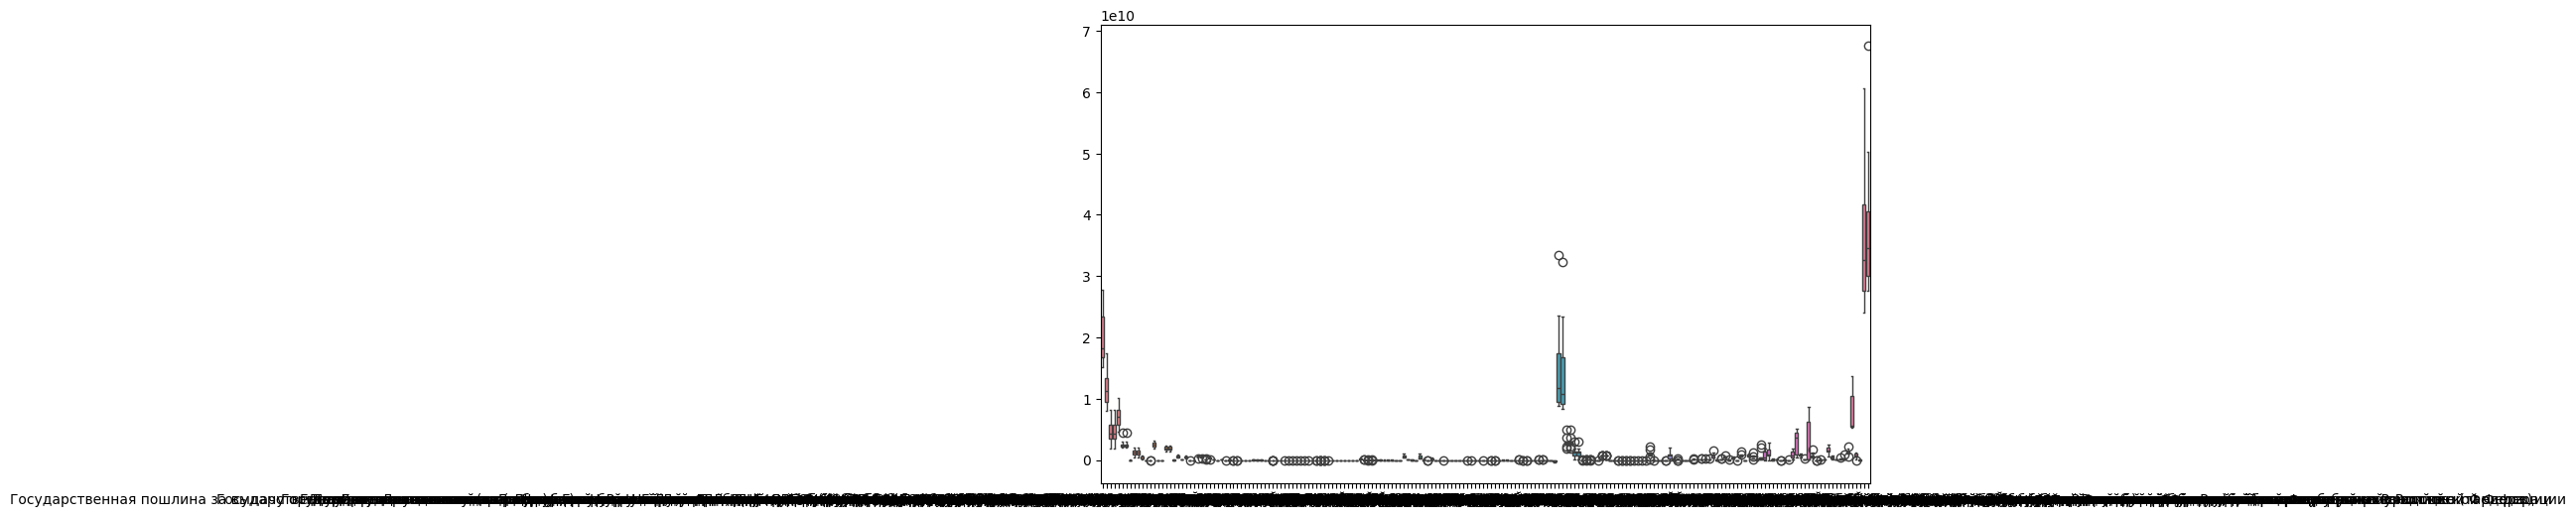

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_merged_budget)
plt.show()

In [39]:
for col in df_merged_budget.columns:
  lower_bound = df_merged_budget[col].quantile(0.15)
  upper_bound = df_merged_budget[col].quantile(0.92)
  df_merged_budget[col] = np.clip(df_merged_budget[col], lower_bound, upper_bound)

/usr/local/lib/python3.11/dist-packages/numpy/core/fromnumeric.py:59: FutureWarning: Downcasting behavior in Series and DataFrame methods 'where', 'mask', and 'clip' is deprecated. In a future version this will not infer object dtypes or cast all-round floats to integers. Instead call result.infer_objects(copy=False) for object inference, or cast round floats explicitly. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return bound(*args, **kwds)
/usr/local/lib/python3.11/dist-packages/numpy/core/fromnumeric.py:59: FutureWarning: Downcasting behavior in Series and DataFrame methods 'where', 'mask', and 'clip' is deprecated. In a future version this will not infer object dtypes or cast all-round floats to integers. Instead call result.infer_objects(copy=False) for object inference, or cast round floats explicitly. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return bound(*args, **kwds)
/usr/loc

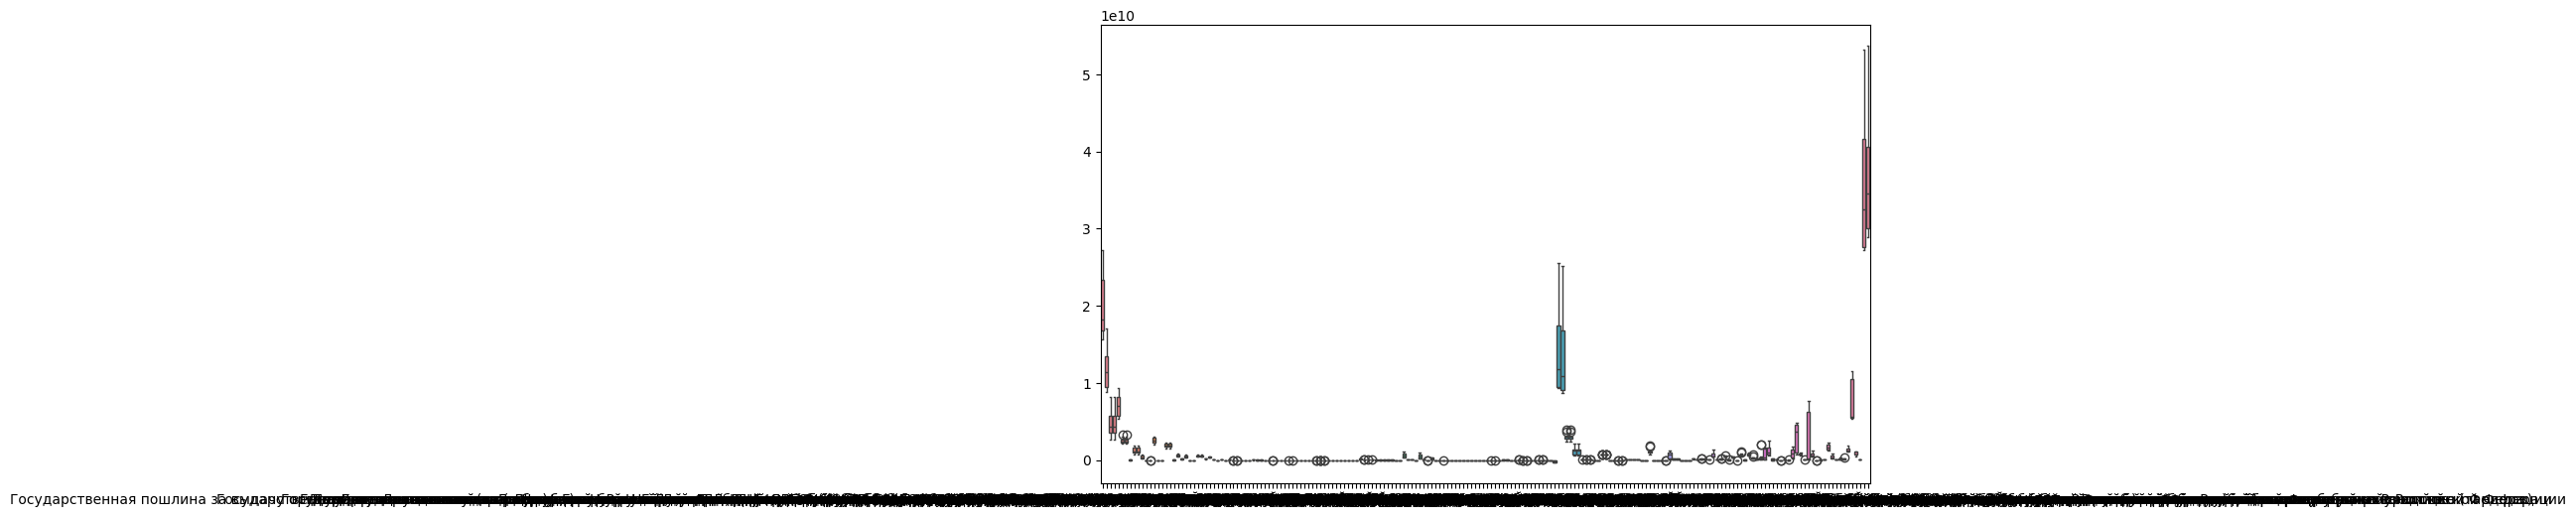

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_merged_budget)
plt.show()
#как мы можем убедиться, после заполнения каждой из колонок граничными значениями по квантилям выбросов стало намного меньше

## 2. Найди параметры, которые влияют на бюджет (3.5 балла)

Поэкспериментируй с параметрами, найди 3 параметра, которые сильно связаны с значением бюджета Карелии за год (тут есть две цифры - расходы бюджета ИТОГО и доходы бюджета ИТОГО - искать параметры надо к обоим на основе **предыдущего года**) (при помощи коэффициента корреляции). Настоятельно рекомендуем поиграть с разными параметрами  - попробовать линейные комбинации, некоторые функции от параметров (log, возведение в степень, etc).

Оставь весь код экспериментов в этом блоке, но в конце опиши, какие параметры в итоге ты берёшь.



---



**Что я хочу сделать?**

* Взять и найти сначала по 3 параметра, наиболее скррелированных с целевыми переменными

* Попробовать линейную комбинацию этих параметров. Например, взять их сумму с какими-то коэффициентами и посмотреть на корреляцию с целевой переменной.

*  Взять рандомную линейную комбинацию логарифмов рандомных столбцов и посмотреть, насколько сиьльно они скоррелированны с логарифмами целевых переменных



In [42]:
targets = df_merged_budget[['Итоговые доходы на следующий год', 'Итоговые расходы на следующий год']]
df_merged_budget_no_t = df_merged_budget.drop(columns=['Итоговые доходы на следующий год', 'Итоговые расходы на следующий год'])
cor_with_inc=dict()
cor_with_exp=dict()
for col in df_merged_budget_no_t.columns:
  cor_with_inc[col] = df_merged_budget_no_t[col].corr(targets['Итоговые доходы на следующий год'])
  cor_with_exp[col] = df_merged_budget_no_t[col].corr(targets['Итоговые расходы на следующий год'])

/usr/local/lib/python3.11/dist-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.11/dist-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


In [43]:
df_of_tops_inc = pd.DataFrame(list(cor_with_inc.items()), columns=['Col', 'Corr'])
top_3 = df_of_tops_inc.nlargest(3, 'Corr')
top_3_cols_inc = top_3['Col'].tolist()
top_3_corrs_inc = top_3['Corr'].tolist()

In [44]:
weights = [0.6, 0.2, 0.2]
lin_comb_inc = sum(df_merged_budget_no_t[col] * weight for col, weight in zip(top_3_cols_inc, weights))
df_merged_budget_no_t = pd.concat([df_merged_budget_no_t, lin_comb_inc.rename('lin_comb_of_top_inc')], axis=1)

cor_with_inc_comb = df_merged_budget_no_t['lin_comb_of_top_inc'].corr(targets['Итоговые доходы на следующий год'])

In [45]:
np.array(top_3_corrs_inc) < cor_with_inc_comb
#как мы видим, линейная комбинация столбцов дает корреляцию с целевой переменной намного большую, чем столбцы по-отдельности.

array([ True,  True,  True])

In [46]:
lin_comb_inc_log = sum(np.log(df_merged_budget_no_t[col]) * weight for col, weight in zip(top_3_cols_inc, weights))
df_merged_budget_no_t = pd.concat([df_merged_budget_no_t, lin_comb_inc_log.rename('log_lin_comb_of_top_inc')], axis=1)

cor_with_log_inc_comb = df_merged_budget_no_t['log_lin_comb_of_top_inc'].corr(np.log(targets['Итоговые доходы на следующий год']))

In [47]:
print(cor_with_log_inc_comb < cor_with_inc_comb)
#как мы видим, брать сумму логарифмов от параметров хоть и дает высокую корреляцию, но все же ниже, чем просто сумма

True


**Теперь проделаем ту же работу с индексами, но для расходов**

In [48]:
df_of_tops_exp = pd.DataFrame(list(cor_with_exp.items()), columns=['Col', 'Corr'])
top_3_exp = df_of_tops_exp.nlargest(3, 'Corr')
top_3_cols_exp = top_3_exp['Col'].tolist()
top_3_corrs_exp = top_3_exp['Corr'].tolist()

In [49]:
weights = [0.5, 0.3, 0.2]
lin_comb_exp = sum(df_merged_budget_no_t[col] * weight for col, weight in zip(top_3_cols_exp, weights))
df_merged_budget_no_t = pd.concat([df_merged_budget_no_t, lin_comb_exp.rename('lin_comb_of_top_exp')], axis=1)

cor_with_exp_comb = df_merged_budget_no_t['lin_comb_of_top_exp'].corr(targets['Итоговые расходы на следующий год'])

In [50]:
np.array(top_3_corrs_exp) < cor_with_exp_comb
#и как мы видим, снова линейная комбинация дала лучший результат корреляции, чем отдельные параметры

array([ True,  True,  True])

In [51]:
lin_comb_exp_log = sum(np.log(df_merged_budget_no_t[col]) * weight for col, weight in zip(top_3_cols_exp, weights))
df_merged_budget_no_t = pd.concat([df_merged_budget_no_t, lin_comb_exp_log.rename('log_lin_comb_of_top_exp')], axis=1)

cor_with_log_exp_comb = df_merged_budget_no_t['log_lin_comb_of_top_exp'].corr(np.log(targets['Итоговые расходы на следующий год']))

In [52]:
print(cor_with_log_exp_comb > cor_with_exp_comb)

False


**Теперь возьмем просто три рандомных столбца по приколу и посмотрим на их корреляцию с доходами и с расходами**

In [53]:
columns_for_cor = df_merged_budget_no_t.iloc[:, [81, 118, 181]]
weights = [0.5, 0.4, 0.1]
lin_comb_of_rand_cols = sum(df_merged_budget_no_t[col] * weight for col, weight in zip(columns_for_cor, weights))
df_merged_budget_no_t = pd.concat([df_merged_budget_no_t, lin_comb_of_rand_cols.rename('lin_comb_of_rand_cols')], axis=1)

In [54]:
cor_with_inc_rand_comb = df_merged_budget_no_t['lin_comb_of_rand_cols'].corr(targets['Итоговые доходы на следующий год'])
cor_with_exp_rand_comb = df_merged_budget_no_t['lin_comb_of_rand_cols'].corr(targets['Итоговые расходы на следующий год'])
print(cor_with_inc_rand_comb)
print(cor_with_exp_rand_comb)
#ну, как можно увидеть, комбинация не удалась. Но попытка - не пытка :)

0.24645373545924593
0.26973258746253437


In [55]:
top_3_cols_inc

['ГОСУДАРСТВЕННАЯ ПОШЛИНА',
 'Государственная пошлина за государственную регистрацию, а также за совершение прочих юридически значимых действий',
 'Коммунальное хозяйство']

In [56]:
top_3_cols_exp

['Коммунальное хозяйство',
 'ГОСУДАРСТВЕННАЯ ПОШЛИНА',
 'Государственная пошлина за государственную регистрацию, а также за совершение прочих юридически значимых действий']

И тут стало грустно, поскольку что с расходами, что с доходами 3 наиболее скоррелированных параметра совпадают. Поэтому я решил поступить следующим образом. Во-первых, не хочется брать две государственные пошлины, потому что они друг с другом скоррелированы, а корреляция параметров, как известно, это не очень - поэтому возьмем что-то еще для доходов. Во-вторых, раз уж параметры у доходов и расходов совпали, а их линейная комбинация дает большую корреляцию - то для расходов возьмем линейную комбинацию, но только гос. пошлины и коммунального хозяйства, потому что вторая пошлина скоррелированна с гос.пошлиной. А также топ-4 и топ-5 скоррелированных параметров.


In [57]:
top_5_exp = df_of_tops_exp.nlargest(5, 'Corr')
top_5_cols_exp = top_5_exp['Col'].tolist()
top_5_corrs_exp = top_5_exp['Corr'].tolist()
top_5_cols_exp[3:5]

['Акцизы на пиво, производимое на территории Российской Федерации',
 'Доходы в виде прибыли, приходящейся на доли в уставных (складочных) капиталах хозяйственных товариществ и обществ, или дивидендов по акциям, принадлежащим Российской Федерации, субъектам Российской Федерации или муниципальным образованиям']

---
И тут я посмотрел на топ-5 параметров, скоррелированных с расходом - и понимаю, что все они является параметрами дохода, поэтому решил взять линейную комбинацию из менее скоррелированных параметров, но зато являющимися параметрами расходов. Поэтому дальше вы можете увидеть, как я беру не топ-5, а уже топ-10, чтобы составить из каких-нибудь из них неплохую линейную комбинацию.

In [58]:
top_15_exp = df_of_tops_exp.nlargest(15, 'Corr')
top_15_cols_exp = top_15_exp['Col'].tolist()
top_15_corrs_exp = top_15_exp['Corr'].tolist()
top_15_cols_exp[3:15]

['Акцизы на пиво, производимое на территории Российской Федерации',
 'Доходы в виде прибыли, приходящейся на доли в уставных (складочных) капиталах хозяйственных товариществ и обществ, или дивидендов по акциям, принадлежащим Российской Федерации, субъектам Российской Федерации или муниципальным образованиям',
 'Налог, взимаемый с налогоплательщиков, выбравших в качестве объекта налогообложения доходы, уменьшенные на величину расходов',
 'Налог на имущество организаций по имуществу, входящему в Единую систему газоснабжения',
 'Государственная пошлина за совершение действий, связанных с лицензированием, с проведением аттестации в случаях, если такая аттестация предусмотрена законодательством Российской Федерации',
 'Государственная пошлина за совершение действий, связанных с лицензированием, с проведением аттестации в случаях, если такая аттестация предусмотрена законодательством Российской Федерации, зачисляемая в бюджеты субъектов Российской Федерации',
 'НАЛОГИ НА ПРИБЫЛЬ, ДОХОДЫ',
 '

In [59]:
chosen_cols = top_15_cols_exp[12:15]
weights = [0.6, 0.3, 0.1]
lin_comb_of_chosen_cols = sum(df_merged_budget_no_t[col] * weight for col, weight in zip(chosen_cols, weights))
df_merged_budget_no_t = pd.concat([df_merged_budget_no_t, lin_comb_of_chosen_cols.rename('Resources_Transport_Education_Combination')], axis=1)

In [60]:
cor_with_exp_chosen_comb = df_merged_budget_no_t['Resources_Transport_Education_Combination'].corr(targets['Итоговые расходы на следующий год'])
np.array(top_15_corrs_exp) < cor_with_exp_chosen_comb

array([False, False, False, False, False, False, False,  True,  True,
        True,  True,  True,  True,  True,  True])

**Хотя это и не является топ-3 параметром, но все же я его выберу как параметр, который является одним из наиболее скоррелированных с расходами, поскольку он включает в себя параметр из расходов, а также разница с топами в корреляции довольно мала**



---

Ну и наконец, создадим линейную комбинацию из гос.пошлины и коммунального хозяйства:

In [61]:
chosen_cols_new = [top_15_cols_exp[0], top_15_cols_exp[1]]
weights = [0.5, 0.5]
lin_comb_of_chosen_cols_new = sum(df_merged_budget_no_t[col] * weight for col, weight in zip(chosen_cols_new, weights))
df_merged_budget_no_t = pd.concat([df_merged_budget_no_t, lin_comb_of_chosen_cols_new.rename('StateDuty_Utilities_Combination')], axis=1)

In [62]:
cor_with_exp_chosen_comb_new = df_merged_budget_no_t['StateDuty_Utilities_Combination'].corr(targets['Итоговые расходы на следующий год'])
np.array(top_15_corrs_exp) < cor_with_exp_chosen_comb_new

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True])

Как мы видим, получилась очень сильная линейная комбинация, которую мы и возьмем. Третьим параметром, который мы возьмем, будет акциз на пиво, поскольку он не является гос. пошлиной и идет сразу после нее по скоррелированности



---



Поскольку я не хочу брать для доходов вторую гос. пошлину, то найдем линейную комбинацию из других параметров, которая даст большую корреляцию, чем еще одна гос.пошлина

In [63]:
top_10_inc = df_of_tops_inc.nlargest(10, 'Corr')
top_10_cols_inc = top_10_inc['Col'].tolist()
top_10_corrs_inc = top_10_inc['Corr'].tolist()
top_10_cols_inc[3:10]

['Акцизы на пиво, производимое на территории Российской Федерации',
 'Государственная пошлина за совершение действий, связанных с лицензированием, с проведением аттестации в случаях, если такая аттестация предусмотрена законодательством Российской Федерации',
 'Государственная пошлина за совершение действий, связанных с лицензированием, с проведением аттестации в случаях, если такая аттестация предусмотрена законодательством Российской Федерации, зачисляемая в бюджеты субъектов Российской Федерации',
 'Налог, взимаемый с налогоплательщиков, выбравших в качестве объекта налогообложения доходы, уменьшенные на величину расходов',
 'Налог на имущество организаций по имуществу, входящему в Единую систему газоснабжения',
 'Другие вопросы в области образования',
 'Социальное обеспечение населения']

In [64]:
chosen_cols_for_inc = [top_10_cols_inc[6], top_10_cols_inc[7]]
weights = [0.6, 0.4]
lin_comb_of_chosen_for_inc = sum(df_merged_budget_no_t[col] * weight for col, weight in zip(chosen_cols_for_inc, weights))
df_merged_budget_no_t = pd.concat([df_merged_budget_no_t, lin_comb_of_chosen_for_inc.rename('Tax_Combination')], axis=1)

In [65]:
cor_with_inc_chosen_comb = df_merged_budget_no_t['Tax_Combination'].corr(targets['Итоговые доходы на следующий год'])
np.array(top_10_corrs_inc) < cor_with_inc_chosen_comb

array([False, False, False, False, False, False,  True,  True,  True,
        True])

Хорошо, опять получился параметр не так сильно скоррелированный с целевой переменной, как топ-2. Однако их корреляции не так сильно различаются, поэтому возьмем его

<font color="violet"> Тут надо написать параметры, которые ты выбрал </font>

Итак, параметры, которые я взял, как **наиболее скоррелированные с доходом**:


*   Государственная пошлина (df_merged_budget_no_t[top_10_cols_inc[0]])
*   Линейная комбинация из(df_merged_budget_no_t['Tax_Combination']):

    1.  Налог, взимаемый с налогоплательщиков, выбравших в качестве объекта налогообложения доходы, уменьшенные на величину расходов
    2.  Налог на имущество организаций по имуществу, входящему в Единую систему газоснабжения


*   Коммунальное хозяйство (df_merged_budget_no_t[top_10_cols_inc[2]])

Параметры, которые я взял, как **наиболее скоррелированные с расходом**:

*  Линейная комбинация из государственной пошлины и коммунального хозяйства(df_merged_budget_no_t['StateDuty_Utilities_Combination'])
*  Акцизы на пиво, производимое на территории Российской Федерации(df_merged_budget_no_t[top_15_cols_exp[3]])
*  Линейная комбинация с весами 0.6, 0.3 и 0.1 (df_merged_budget_no_t['Resources_Transport_Education_Combination']) из:

  1.   ПЛАТЕЖИ ПРИ ПОЛЬЗОВАНИИ ПРИРОДНЫМИ РЕСУРСАМИ
  2.   Транспортный налог с физических лиц
  3.   Другие вопросы в области образования






# 3. Графики (1 балл)

Построй графики с выбранными параметрами и бюджетом Карелии. Что ты на них видишь?

In [66]:
df_with_exp = pd.concat([df_merged_budget_no_t['StateDuty_Utilities_Combination'], df_merged_budget_no_t[top_15_cols_exp[3]], df_merged_budget_no_t['Resources_Transport_Education_Combination']], axis=1)
df_with_inc = pd.concat([df_merged_budget_no_t[top_10_cols_inc[0]], df_merged_budget_no_t['Tax_Combination'], df_merged_budget_no_t[top_10_cols_inc[2]]], axis=1)

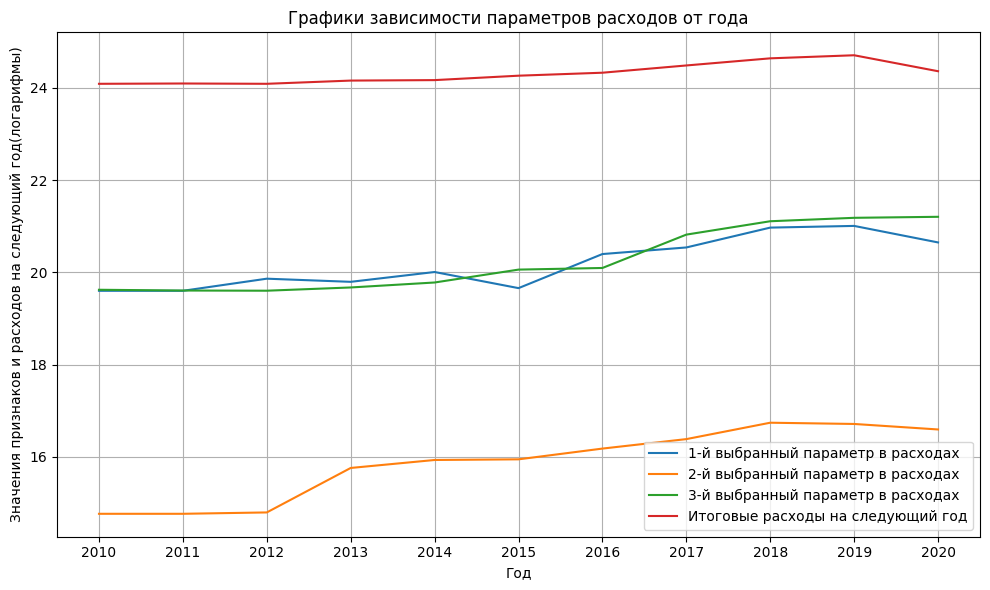

In [67]:
plt.figure(figsize = (10,6))
for i in range(0, 3):
    plt.plot(df_merged_budget_no_t.index, np.log(df_with_exp.iloc[:, i]), linestyle='-', label=f'{i+1}-й выбранный параметр в расходах')

plt.plot(targets.index, np.log(targets['Итоговые расходы на следующий год']), label = 'Итоговые расходы на следующий год')

plt.title('Графики зависимости параметров расходов от года')
plt.xlabel('Год')
plt.ylabel('Значения признаков и расходов на следующий год(логарифмы)')

plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

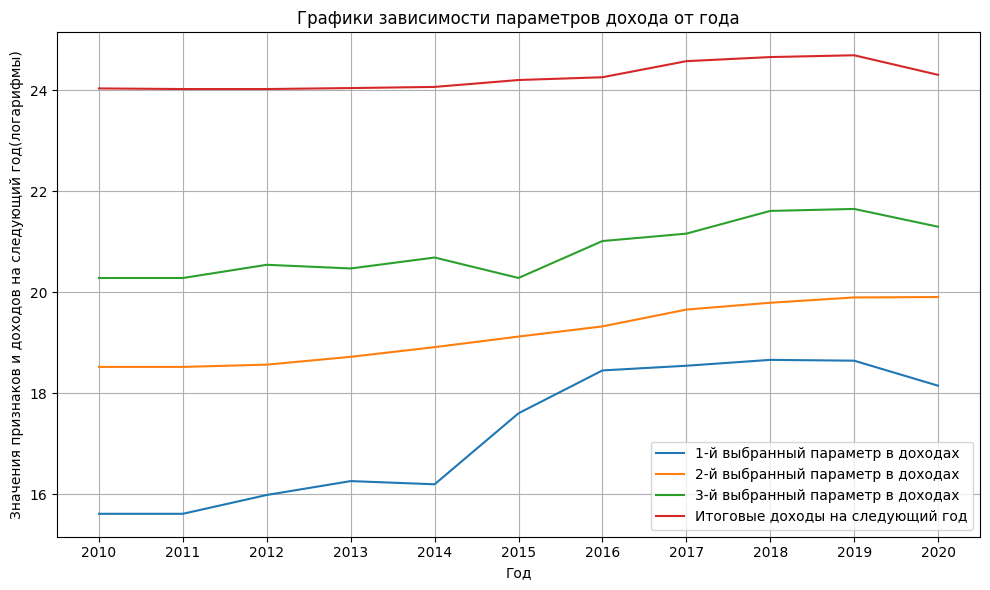

In [68]:
plt.figure(figsize = (10,6))
for i in range(0, 3):
    plt.plot(df_merged_budget_no_t.index, np.log(df_with_inc.iloc[:, i]), linestyle='-', label=f'{i+1}-й выбранный параметр в доходах')

plt.plot(targets.index, np.log(targets['Итоговые доходы на следующий год']), label = 'Итоговые доходы на следующий год')

plt.title('Графики зависимости параметров дохода от года')
plt.xlabel('Год')
plt.ylabel('Значения признаков и доходов на следующий год(логарифмы)')

plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

Как можно видеть на этих графиках, поскольку мы выбрали одни из наиболее скоррелированных с целевыми переменными параметры - то они повторяют практически все тенденции целевой переменной, что говорит о том, что мы все сделали правильно. Логарифмическая шкала позволяет поставить графики поближе друг к другу, чтобы разница значений не влияла на то, как мы воспринимаем график


## 4. Анализ параметров (2 балла)

На основе графиков и самих параметров, расскажи:

- Построй гипотезы, наблюдаешь ли ты казуацию или здесь просто совпадение?
- Предложи гипотезы, как проверить, нет ли ошибок в твоих выводах
- Проанализируй взаимосвязь с параметрами между собой. Являются ли они сильноскореллированными? Имеет ли смысл использовать их всех вместе или достаточно одного?

Думаю, что все-таки здесь можно наблюдать причинно-следственную связь. Проанализируем доходы:
1. Растет гос.пошлина - это скорее всего значит, что стало больше оказываться юридических услуг или стало больше регистрироваться бизнесов в этом году, что говорит о росте деловой активности. Следовательно, больше доходы, больше продажи, что в будущем приведет к повышению налоговых поступлений и доходов бюджета.
2. Скорре всего, раз этот параметр растет, то растет и прибыль предприятий, а это значит, что они развиваются и в экономике все хорошо и эти фирмы будут зарабатывать еще больше в следующем периоде, а значит, доходы государства будут расти за счет роста экономики.
3. Как я понял, это доходы от предоставления коммунальных услуг. И опять же, логично, что если эти доходы растут - то скорее всего, больше строится домов, люди заселяют больше квартир, а значит, раз больше квартир строится - то, во-первых, у людей доходы растут(ведь им надо покупать квартиры), следовательно, экономика растет, а во-вторых, раз больше квартир будут заселены - больше коммунальных услуг будет оплачено. А потому доходы возрастут.

Теперь проанализируем расходы:
Для начала стоит предположить, почему параметры доходов так сильно скоррелированны с расходами на следующий год. Поскольку государство постоянно планирует какие-то проекты, планируемые расходы на них будут стимулировать увеличение доходов сейчас. Например, если государство планирует крупные проекты в образовании, оно может повысить налоги, чтобы заработать излишек на них. Ну и понятно, что скорее всего так будет работать с расходами практически во всех сферах. К примеру, если государство хочет увеличить субсидии в будущем - то сейчас оно скорее всего соберет побольше налогов и т.д.

Анализируем параметры:

1. Высокие доходы от госпошлин и коммунальных платежей позволяют, как мы говорили, больше расходовать на инфраструктуру или различные социальные проекты в будущем. Можно установить и обратную связь - допустим, сейчас увеличились расходы на коммунальное хозяйство (например, ремонт дорог) стимулирует экономическую активность, ну и следователно, рост госпошлин(говорили), а рост гос.пошлин ведет к росту расходов в будущем.

2. Рост доходов от акцизов на пиво может быть связан с увеличением потребления пива, а поскольку государство стремится заботиться о гражданах, то оно будет тратить больше на здравоохранение (борьба с алкоголизмом)

3.

  *   Рост платежей за ресурсы - следовательно, увеличение расходов на экологические программы.
  *   Рост налога - следовательно, увеличение числа автомобилей, увеличение доходов от налогов - следовательно, растут планируемые расходы на дорожную инфраструктуру(например, постройку дорог).
---
Гипотезы могут не работать, если, например, есть 3-я переменная, которая влияет на рост обеих переменных одновременно.

К примеру, вот мы видим, что акцизы на пиво коррелируют с расходами на следующий год. 3-й переменной может быть инфляция - она может одновременно увеличивать и акцизы (так как цены растут), и расходы бюджета (из-за роста стоимости услуг).

Плюс, гипотезы могут не работать, потому что у нас достаточно мало данных - они были собраны всего лишь за 10 лет и на большем временном диапазоне все может поменяться.

Ну и к тому же, могут быть, как я описал, могут быть обратные связи, и поэтому предположенные гипотезы могут быть не верны.


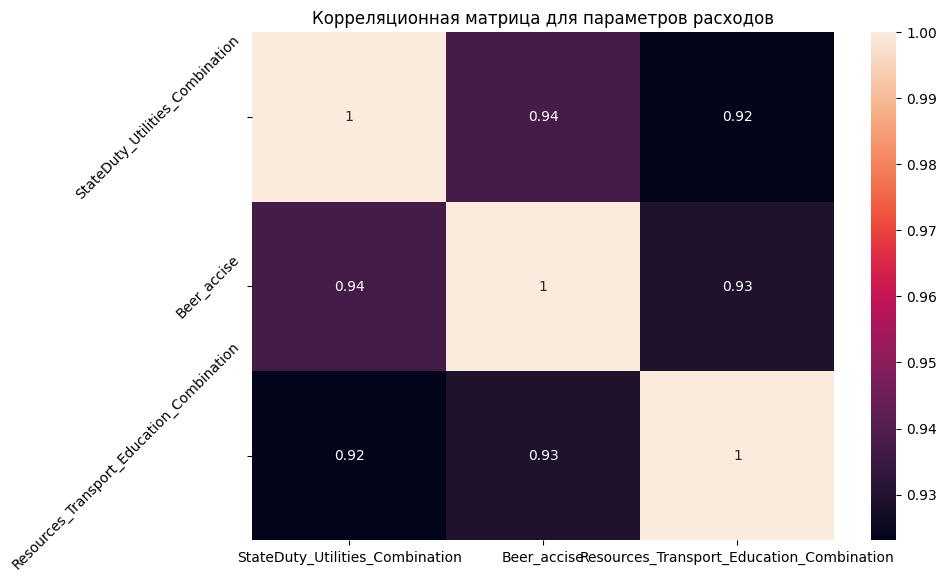

In [69]:
df_with_exp.columns = ['StateDuty_Utilities_Combination', 'Beer_accise', 'Resources_Transport_Education_Combination']

corr_matrix = df_with_exp.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True)
plt.title('Корреляционная матрица для параметров расходов')
plt.yticks(rotation=45)
plt.tight_layout()
plt.show()

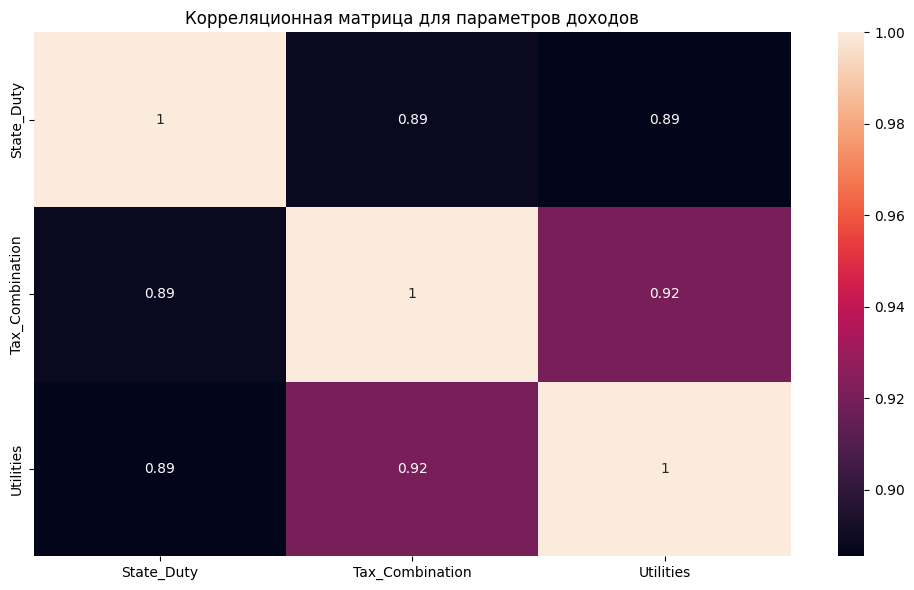

In [70]:
df_with_inc.columns = ['State_Duty', 'Tax_Combination', 'Utilities']

corr_matrix = df_with_inc.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True)
plt.title('Корреляционная матрица для параметров доходов')
plt.tight_layout()
plt.show()

Не нужно использовать одновременно все параметры, потому что они достаточно сильно скоррелированны между собой (как бы я ни старался решить эту проблему пунктом выше), а значит, их одновременное использование не будет привносить новой информации для анализа и только лишь усложнит его. К тому же, если мы будем обучать линейную модельку, то это приведет к ее переобучению(можно показать через простой примерой, когда параметры линейно зависимы и из-за этого у модели есть просто бесконечно много решений, дающих минимальную ошибку(это без регуляризации)), к тому же, модель не сможет определить, какой из параметров явно влияет на целевую переменную, поскольку рост одного приводит к росту другого - и из-за этого сложно расставить веса

## 5. Линейная модель - BONUS TASK! - 2 балла.

Бонусное задание - попробуй построить линейную модель бюджета на основе выбранных параметров выше и (возможно) других параметров из датасета. Как думаешь, она состоятельная? Как бы ты проверял эту модель на корректность?

Из-за проблемы с скоррелированностью параметров, мы возьмем только по-одному для расходов и для доходов из тех, которые я уже нашел. Ну и добавим еще каких-то других параметров. И на самом деле, не очень брать параметры, которые очень скоррелированны с целевой переменной, потому что модель по сути будет подстраиваться только под них, заучивать зависимости, что может плохо потом сказаться на ней, если эти зависимости станут слабее или если это проблема в данных(но скорее всего нет 😀). В нашем случае это конечно поможет предсказывать бюджет


In [71]:
top_20_exp = df_of_tops_exp.nlargest(20, 'Corr')
top_20_cols_exp = top_20_exp['Col'].tolist()
top_20_corrs_exp = top_20_exp['Corr'].tolist()
Params_to_choose_exp = pd.concat([df_merged_budget_no_t['StateDuty_Utilities_Combination'], df_merged_budget_no_t[top_20_cols_exp[14]], df_merged_budget_no_t[top_20_cols_exp[12]]], axis=1)
top_20_cols_exp[14]

'Другие вопросы в области образования'

In [72]:
#Найдем еще несколько параметров, которые применим для обучения в линейной модели
top_15_inc = df_of_tops_inc.nlargest(15, 'Corr')
top_15_cols_inc = top_15_inc['Col'].tolist()
top_15_corrs_inc = top_15_inc['Corr'].tolist()
top_15_cols_inc[0:15]
Params_to_choose_inc = pd.concat([df_merged_budget_no_t['Tax_Combination'], df_merged_budget_no_t[top_15_cols_inc[9]], df_merged_budget_no_t[top_15_cols_inc[14]]], axis=1)

In [73]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

X = Params_to_choose_exp
y = targets['Итоговые расходы на следующий год']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=52)

#отнормируем все данные, чтобы веса подбирались нормально

def standart_scaling(data):
    mean_in_col = np.mean(data, axis=0)
    std_in_col = np.std(data, axis=0)
    scaled_data = (data - mean_in_col) / std_in_col
    return scaled_data, mean_in_col, std_in_col #возвращаем все, потмоу что не можем нормировать тестовые данные через функцию, поскольку модель ничего не должна знать о тесте

X_train_scaled, mean_train, std_train = standart_scaling(X_train)

X_test_scaled = (X_test - mean_train) / std_train

model = LinearRegression()
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

r2 = r2_score(y_test, y_pred)

print(f"R^2 Score: {r2:.2f}")

R^2 Score: 0.82


In [74]:
X = Params_to_choose_inc
y = targets['Итоговые доходы на следующий год']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=52)

X_train_scaled, mean_train, std_train = standart_scaling(X_train)

X_test_scaled = (X_test - mean_train) / std_train

model = LinearRegression()
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

r2 = r2_score(y_test, y_pred)

print(f"R^2 Score: {r2:.2f}")

R^2 Score: 0.38


Ну, по крайней мере модели уже работают лучше, чем константные предсказания. К тому же, модель по предсказыванию доходов вообще показывает очень высокий R^2 Score, что говорит о том, что она довольно состоятельно. Опять же, конечно, не так много данных, но работает она на наших хорошо